# Visualizing Quantitative Data
<hr style="height:1px;border:none;color:#666;background-color:#666;" />

We generally use different types of charts to visualize quantitative (numerical) data and qualitative (ordinal or nominal) data.

For quantitative data, we most often use histograms, box plots, and scatter plots.

We can use the [seaborn plotting library](http://seaborn.pydata.org/) to create these plots in Python. We will use a dataset containing information about passengers aboard the Titanic.

In [20]:
# Import seaborn and apply its plotting styles
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()


In [4]:
# Load the dataset and drop N/A values to make plot function calls simpler
titanic = sns.load_dataset('titanic').dropna().reset_index(drop=True)

print(titanic.shape)
titanic.head()

(182, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
2,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
3,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
4,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


## Histograms
<hr>

We can see that the dataset contains one row for every passenger. Each row includes the age of the passenger and the amount the passenger paid for a ticket. Let's visualize the ages using a histogram. We can use seaborn's `distplot` function:

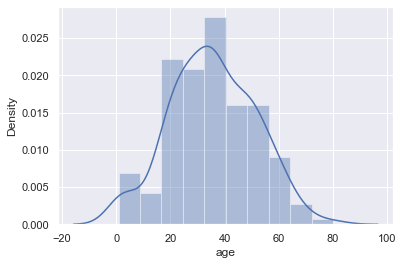

In [15]:
# Adding a semi-colon at the end tells Jupyter not to output the
# usual <matplotlib.axes._subplots.AxesSubplot> line
sns.distplot(titanic['age']);

By default, seaborn's `distplot` function will output a smoothed curve that roughly fits the distribution. We can also add a rugplot which marks each individual point on the x-axis:

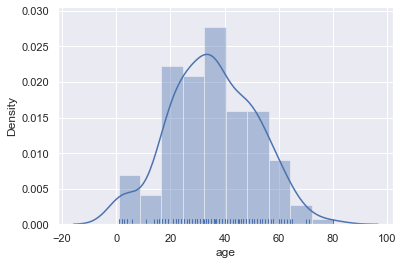

In [16]:
sns.distplot(titanic['age'], rug=True);

We can also plot the distribution itself. Adjusting the number of bins shows that there were a number of children on board.

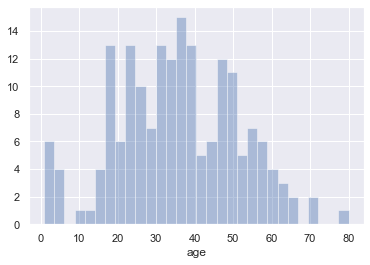

In [17]:
sns.distplot(titanic['age'], kde=False, bins=30);

## Box plots
<hr>

Box plots are a convenient way to see where most of the data lie. Typically, we use the 25th and 75th percentiles of the data as the start and endpoints of the box and draw a line within the box for the 50th percentile (the median). We draw two "whiskers" that extend to show the the remaining data except outliers, which are marked as individual points outside the whiskers.

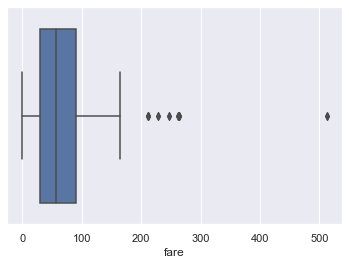

In [18]:
sns.boxplot(x='fare', data=titanic);

We typically use the Inter-Quartile Range (IQR) to determine which points are considered outliers for the box plot. The IQR is the difference between the 75th percentile of the data and the 25th percentile.

In [21]:
lower, upper = np.percentile(titanic['fare'], [25, 75])
iqr = upper - lower
iqr

60.3

Values greater than 1.5 $\times$ IQR above the 75th percentile and less than 1.5 $\times$ IQR below the 25th percentile are considered outliers and we can see them marked indivdiually on the boxplot above:

In [22]:
upper_cutoff = upper + 1.5 * iqr
lower_cutoff = lower - 1.5 * iqr
upper_cutoff, lower_cutoff

(180.45, -60.749999999999986)

Although histograms show the entire distribution at once, box plots are often easier to understand when we split the data by different categories. For example, we can make one box plot for each passenger type:

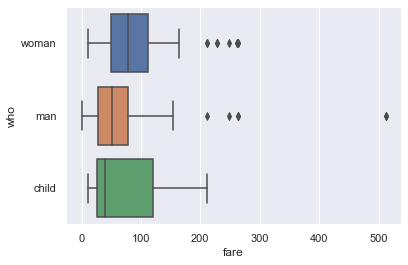

In [23]:
sns.boxplot(x='fare', y='who', data=titanic);

The separate box plots are much easier to understand than the overlaid histogram below which plots the same data:

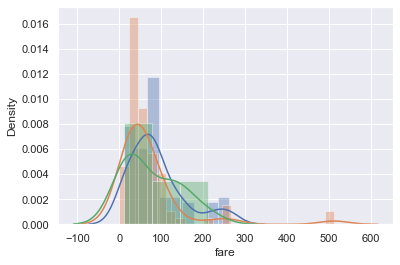

In [24]:
sns.distplot(titanic.loc[titanic['who'] == 'woman', 'fare'])
sns.distplot(titanic.loc[titanic['who'] == 'man', 'fare'])
sns.distplot(titanic.loc[titanic['who'] == 'child', 'fare']);

## Brief Aside on Using Seaborn
<hr>

You may have noticed that the `boxplot` call to make separate box plots for the `who` column was simpler than the equivalent code to make an overlaid histogram. Although `sns.distplot` takes in an array or Series of data, most other seaborn functions allow you to pass in a DataFrame and specify which column to plot on the x and y axes. For example:

```python
# Plots the `fare` column of the `titanic` DF on the x-axis
sns.boxplot(x='fare', data=titanic);
```

When the column is categorical (the `'who'` column contained `'woman'`, `'man'`, and `'child'`), seaborn will automatically split the data by category before plotting. This means we don't have to filter out each category ourselves like we did for `sns.distplot`.

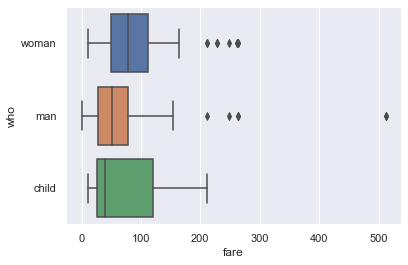

In [25]:
# fare (numerical) on the x-axis,
# who (nominal) on the y-axis
sns.boxplot(x='fare', y='who', data=titanic);

## Scatter Plots
<hr>
Scatter plots are used to compare two quantitative variables. We can compare the `age` and `fare` columns of our Titanic dataset using a scatter plot.

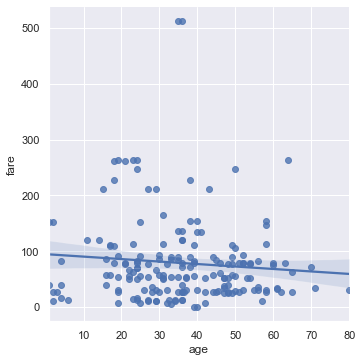

In [26]:
sns.lmplot(x='age', y='fare', data=titanic);

By default seaborn will also fit a regression line to our scatterplot and bootstrap the scatterplot to create a 95% confidence interval around the regression line shown as the light blue shading around the line above. In this case, the regression line doesn't seem to fit the scatter plot very well so we can turn off the regression.

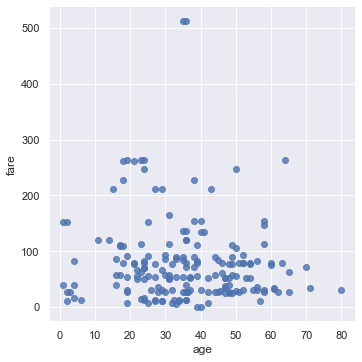

In [27]:
sns.lmplot(x='age', y='fare', data=ti, fit_reg=False);

We can color the points using a categorical variable. Let's use the `who` column once more:

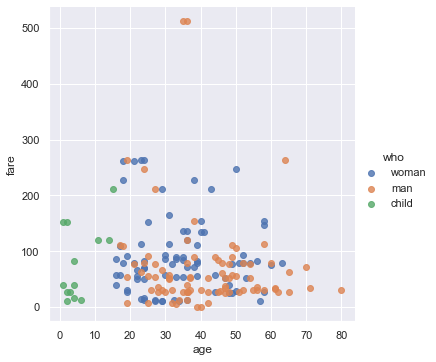

In [28]:
sns.lmplot(x='age', y='fare', hue='who', data=ti, fit_reg=False);

From this plot we can see that all passengers below the age of 18 or so were marked as `child`. There doesn't seem to be a noticable split between male and female passenger fares, although the two most expensive tickets were purchased by males.